In [1]:
# Library Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl

In [2]:
df = pd.read_csv("linuxData\galaxyData2.csv", delimiter=",", low_memory=False)

# Only getting galaxies with particles
df = df[df["Particles"] == True]
df["N Particles"] = pd.to_numeric(df["N Particles"])
df = df[df["N Particles"] > 0]

# Getting nonzero sfr
dfSamp = df[df["Star Formation Rate"] > 0]

Text(0.5, 0, 'log Mass')

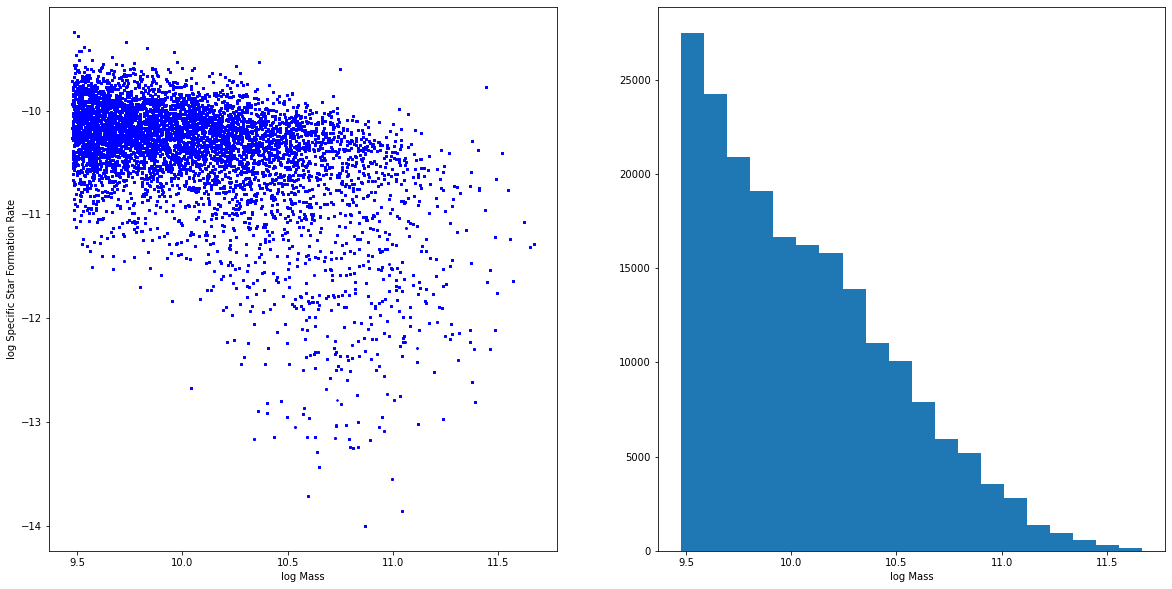

In [3]:
masses = dfSamp["Mass"].to_numpy()
sfrs = dfSamp["Star Formation Rate"].to_numpy()

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.plot(np.log10(masses), np.log10(sfrs/masses), "bo", markersize=1)
plt.xlabel("log Mass")
plt.ylabel("log Specific Star Formation Rate")


plt.subplot(1,2,2)
h = plt.hist(np.log10(masses), bins=20)
plt.xlabel("log Mass")

c:\Users\Work Account\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Work Account\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Work Account\anaconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(


Text(0, 0.5, '$\\log_{10} |SFR / M_*|$')

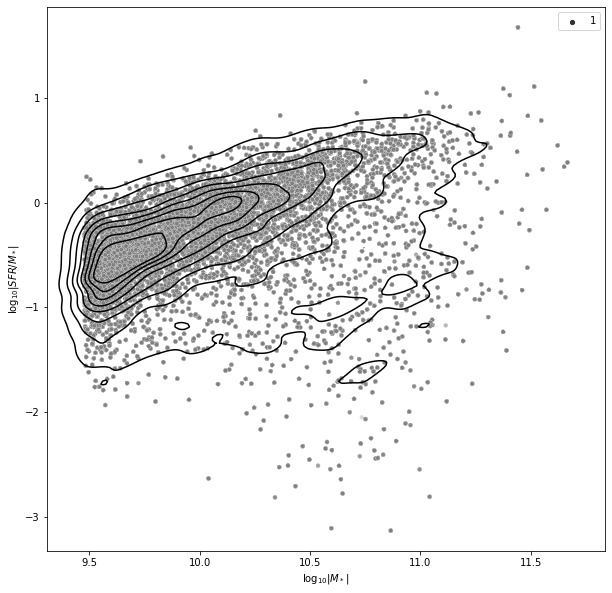

In [4]:
import seaborn as sns

logmass = np.log10(masses)
logsfr = np.log10(sfrs)

plt.figure(figsize=(10,10))
sns.scatterplot(logmass, logsfr, size=1, color="gray", alpha=0.1)
sns.kdeplot(logmass, logsfr, levels=9, color="k", linewidth=2)
plt.xlabel("$\log_{10} |M_*|$")
plt.ylabel("$\log_{10} |SFR / M_*|$")


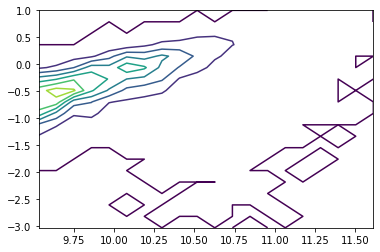

In [17]:
#logmass = np.log10(masses)
#logsfr = np.log10(sfrs/masses)

h, xedges, yedges = np.histogram2d(logmass, logsfr, bins=20)
xbins = xedges[:-1] + (xedges[1] - xedges[0]) / 2
ybins = yedges[:-1] + (yedges[1] - yedges[0]) / 2

h = h.T
CS = plt.contour(xbins, ybins, h)
#plt.scatter(masses, sfrs)
#plt.show()

In [28]:
h, xedges, yedges = np.histogram2d(logmass, logsfr, bins=20)

xbins = xedges[:-1] + (xedges[1] - xedges[0]) / 2
ybins = yedges[:-1] + (yedges[1] - yedges[0]) / 2



[ 9.53251614  9.64198603  9.75145591  9.8609258   9.97039569 10.07986557
 10.18933546 10.29880535 10.40827523 10.51774512 10.62721501 10.73668489
 10.84615478 10.95562467 11.06509456 11.17456444 11.28403433 11.39350422
 11.5029741  11.61244399]


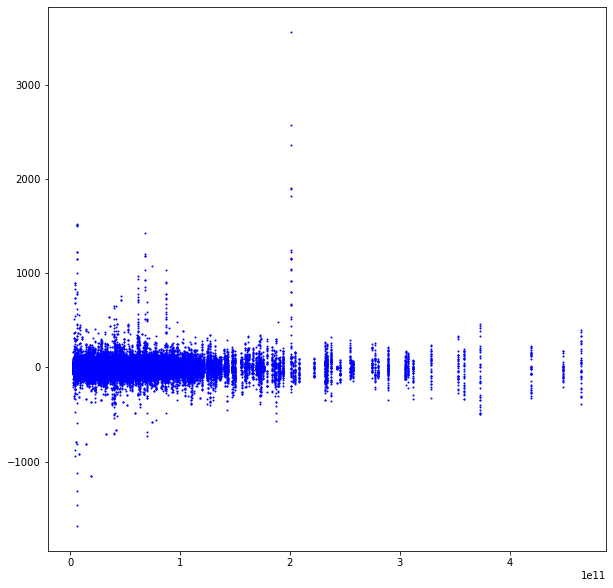

In [4]:
velocities = dfSamp["Velocity"].to_numpy(dtype="float")

plt.figure(figsize=(10,10))
plt.plot(masses, velocities, "bo", markersize=1)

[-3.13483537 -2.71054022 -2.28624506 -1.86194991 -1.43765475 -1.0133596
 -0.58906445 -0.16476929  0.25952586  0.68382102  1.10811617]


c:\Users\Work Account\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Work Account\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


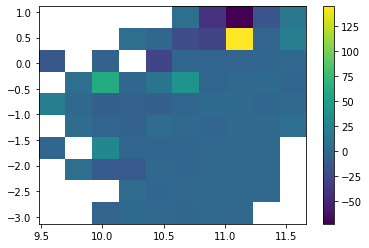

In [135]:
df = pd.read_csv("linuxData/galaxyData2.csv", delimiter=",", low_memory=False)

import seaborn as sns

# Only getting galaxies with particles
df = df[df["Particles"] == True]
df["N Particles"] = pd.to_numeric(df["N Particles"])
df = df[df["N Particles"] > 0]

df = df[df["Star Formation Rate"] > 0]

# Logging the mass and star formation rates
df["Mass"] = np.log10(df["Mass"])
df["Star Formation Rate"] = np.log10(df["Star Formation Rate"])

# Getting the bins
binNum = 10
h, xedges, yedges = np.histogram2d(df["Mass"], df["Star Formation Rate"], bins=binNum)
df["Binned Mass"], mbins= pd.cut(df["Mass"], xedges, labels=False, retbins=True)
df["Binned Sfr"], sbins = pd.cut(df["Star Formation Rate"], yedges, labels=False, retbins=True)

massBins = np.unique(df["Binned Mass"])
sfrBins = np.unique(df["Binned Sfr"])

massBins = massBins[:-1]
sfrBins = sfrBins[:-1]

# Creating grid for plotting
x, y = np.meshgrid(mbins, sbins)
z = np.zeros((binNum, binNum))

# Assigning velocities to the grid
for m in range(binNum):
    for s in range(binNum):
        vels = df[df["Binned Mass"] == massBins[m]]
        vels = vels[vels["Binned Sfr"] == sfrBins[s]]

        z[m][s] = np.mean(vels["Velocity"].to_numpy(dtype=np.float64))

mass = df["Mass"]
sfr = df["Star Formation Rate"]



plt.pcolormesh(x, y, z)
plt.colorbar()


c:\Users\Work Account\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Work Account\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Work Account\anaconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(


Text(0, 0.5, '$\\log_{10} |SFR|$')

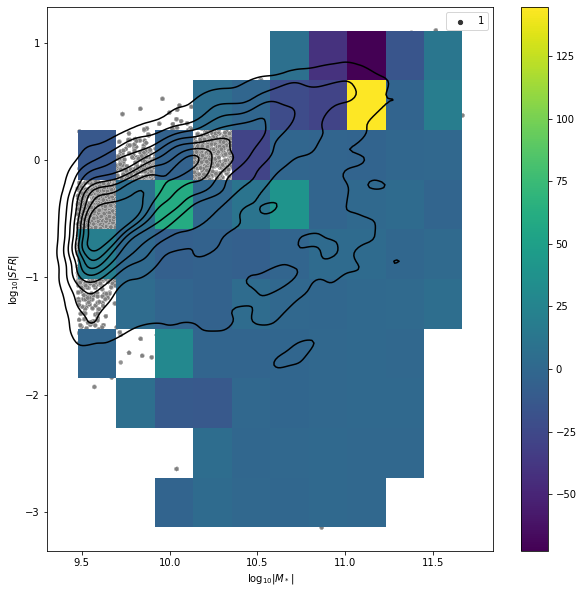

In [118]:
plt.figure(figsize=(10,10))
sns.scatterplot(mass, sfr, size=1, color="gray", alpha=0.1)
sns.kdeplot(x=mass, y=sfr, levels=9, color="k", linewidth=2)
plt.pcolormesh(x, y, z)
plt.colorbar()

plt.xlabel("$\log_{10} |M_*|$")
plt.ylabel("$\log_{10} |SFR|$")

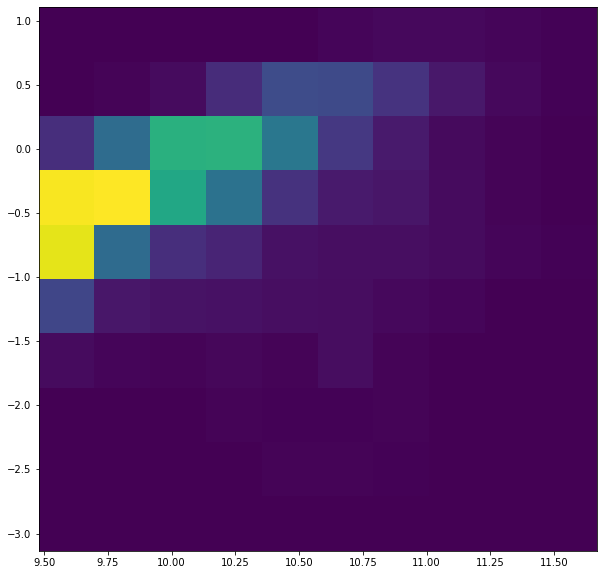

In [69]:
t = df[df["Star Formation Rate"] > 0]

mass = t["Mass"]
sfr = t["Star Formation Rate"]

logmass = np.log10(mass)
logsfr = np.log10(sfr)

plt.figure(figsize=(10,10))
h = plt.hist2d(logmass, logsfr, bins=10)

In [6]:
''' Binning the weighted velocity data '''

df = pd.read_csv("linuxData/galaxyData.csv", delimiter=",", low_memory=False)

# Only getting galaxies with particles
df = df[df["Particles"] == True]
df["N Particles"] = pd.to_numeric(df["N Particles"])
df = df[df["N Particles"] > 0]

df = df[df["Star Formation Rate"] > 0]

# Logging the mass and star formation rates
df["Mass"] = np.log10(df["Mass"])
df["Star Formation Rate"] = np.log10(df["Star Formation Rate"])

# Creating bins
binNum = 10
df["Binned Mass"], massBinVals = pd.qcut(df["Mass"], binNum, retbins=True)
df["Binned Sfr"], sfrBinVals = pd.qcut(df["Star Formation Rate"], binNum, retbins=True)

massBins = np.unique(df["Binned Mass"])
sfrBins = np.unique(df["Binned Sfr"])

x, y = np.meshgrid(massBinVals, sfrBinVals)

# Creating grid for plotting
x, y = np.meshgrid(massBinVals, sfrBinVals)
z = np.zeros((binNum, binNum))

# Assigning velocities to the grid
for m in range(binNum):
    for s in range(binNum):
        vels = df[df["Binned Mass"] == massBins[m]]
        vels = vels[vels["Binned Sfr"] == sfrBins[s]]

        z[m][s] = np.mean(vels["Velocity"].to_numpy(dtype=np.float64))

c:\Users\Work Account\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Work Account\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


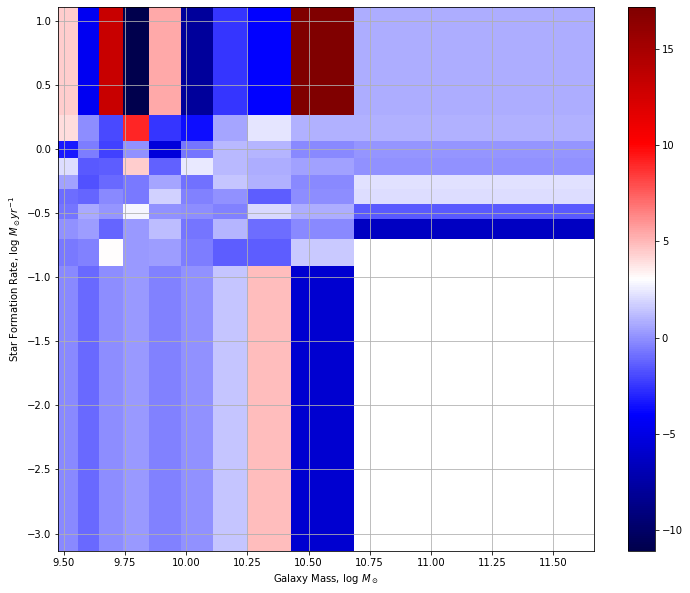

In [11]:
''' Plotting the binned data '''

plt.figure(figsize=(12,10))    
#ax = plt.pcolormesh(x, y, z, norm=mpl.colors.LogNorm())
ax = plt.pcolormesh(x, y, z, cmap="seismic")
plt.colorbar()
plt.xlabel("Galaxy Mass, $\log \: M_\odot$")
plt.ylabel("Star Formation Rate, $\log \: M_\odot yr^{-1}$")

#plt.plot(df["Mass"].to_numpy(dtype="float"), df["Star Formation Rate"].to_numpy(dtype="float"), "ko")
plt.grid()

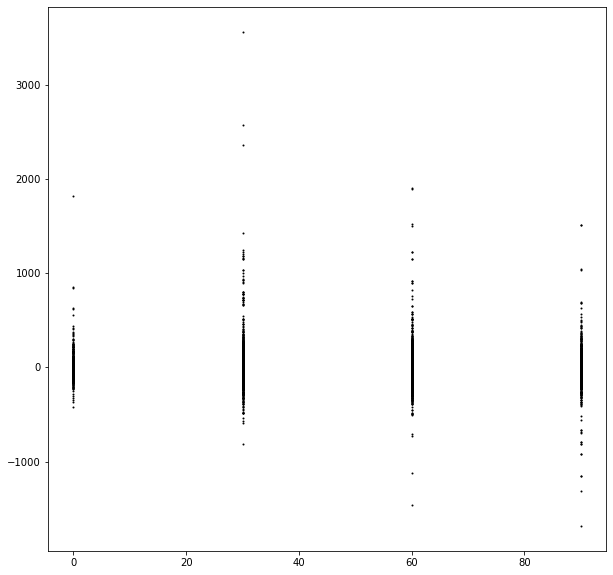

In [18]:
plt.figure(figsize=(10,10))
plt.plot(df["Inclination"].to_numpy(dtype="float"), df["Velocity"].to_numpy(dtype="float"), "ko", markersize=1)


In [1]:
from dataAnalysisFunctions import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Defining the velocity bins 
velBins = 80
specBins = np.linspace(-500, 500, velBins, endpoint=True)
specBin = np.linspace(-500, 500, (velBins-1), endpoint=True)

# Defining the number of mass and sfr bins
binNum = 10

# Loading in the galaxy data
galaxyData = pd.read_csv("linuxData/galaxyData2.csv", delimiter=",")

# Binning the velocity spectrum
galaxyData = binVelocities("linuxData/spectrum.txt", "linuxData/masses.txt", galaxyData, specBins)

# Binning the masses and star formation rates
galaxyData, massBins, sfrBins, massBinVals, sfrBinVals = binGalaxy(galaxyData, binNum)

# Initialising a figure and counter
plt.figure(figsize=(30,30))

# Reversing the sfr bins to get right plot ordering
ss = [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

# Looping through each bin, stacking spectra and plotting it
for s in range(binNum):
    for m in range(binNum):

        # Getting values in this bin only
        vels = galaxyData[galaxyData["Binned Mass"] == massBins[m]]
        vels = vels[vels["Binned Sfr"] == sfrBins[s]]

        # Stacking velocities in this bin
        if len(vels) > 1:
            stack = np.sum(vels["Spectra"])
        elif len(vels) == 1:
            stack = vels["Spectra"]
        else:
            stack = np.zeros(velBins-1)

        # Getting the label
        label = "M: {:.2f} SFR: {:.2f}".format(massBinVals[m], sfrBinVals[s])

        plt.subplot2grid((10,10), (ss[s], m))
        plt.plot(specBin, stack, "b", label=label)
        plt.vlines([-20, 20], 0, max(stack), "r")
        plt.legend()

  0%|          | 1/210820 [00:00<?, ?it/s]


TypeError: write() argument must be str, not numpy.ndarray

In [ ]:
from dataAnalysisFunctions import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading in the galaxy data
galaxyData = pd.read_csv("linuxData/galaxyData2.csv", delimiter=",")

createBinnedFiles("linuxData/spectrum.txt", "linuxData/masses.txt", galaxyData, 10)

In [1]:
from dataAnalysisFunctions import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading in the galaxy data
galaxyData = pd.read_csv("linuxData/galaxyData2.csv", delimiter=",")

binNum = 10

# Binning the masses and star formation rates
galaxyData, massBins, sfrBins, massBinVals, sfrBinVals = binGalaxy(galaxyData, binNum)

mean, std, skew = getBinStats(massBinVals, sfrBinVals, binNum)

c:\Users\Matth\OneDrive\Documents\University [MPhys]\Year 4\PX4310 - Physics Project\Code\dataAnalysisFunctions.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["N Particles"] = pd.to_numeric(df["N Particles"])
c:\Users\Matth\OneDrive\Documents\University [MPhys]\Year 4\PX4310 - Physics Project\Code\dataAnalysisFunctions.py:169: UserWarning: loadtxt: Empty input file: "binnedData/M9.48S-3.13V.txt"
  velsData = np.loadtxt(filenameV)
c:\Users\Matth\OneDrive\Documents\University [MPhys]\Year 4\PX4310 - Physics Project\Code\dataAnalysisFunctions.py:170: UserWarning: loadtxt: Empty input file: "binnedData/M9.48S-3.13M.txt"
  massData = np.loadtxt(filenameM)
c:\Users\Matth\OneDrive\Documents\University [MPhys]\Year 4\PX4310 - Physics Project\Cod

No handles with labels found to put in legend.


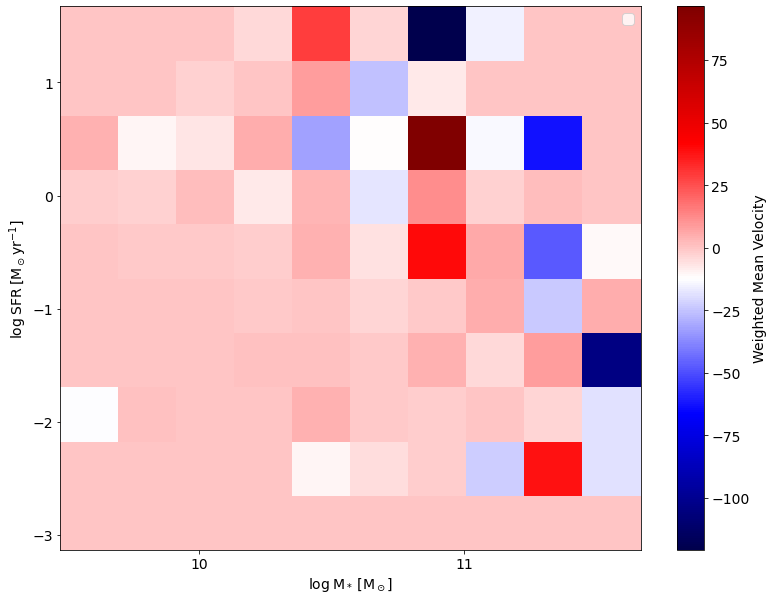

In [25]:
import matplotlib as mpl

plt.figure(figsize=(13,10))
plt.rcParams.update({"font.size": 14})
plt.pcolormesh(massBinVals, sfrBinVals, mean, cmap="seismic")
plt.colorbar(label="Weighted Mean Velocity")
plt.xlabel("$\\rm \log \: M_* \:[M_\odot]$")
plt.ylabel("$\\rm \log \: SFR \:[M_\odot yr^{-1}]$")
plt.xticks([ 10, 11, ], ["10", "11"])
plt.legend()

No handles with labels found to put in legend.


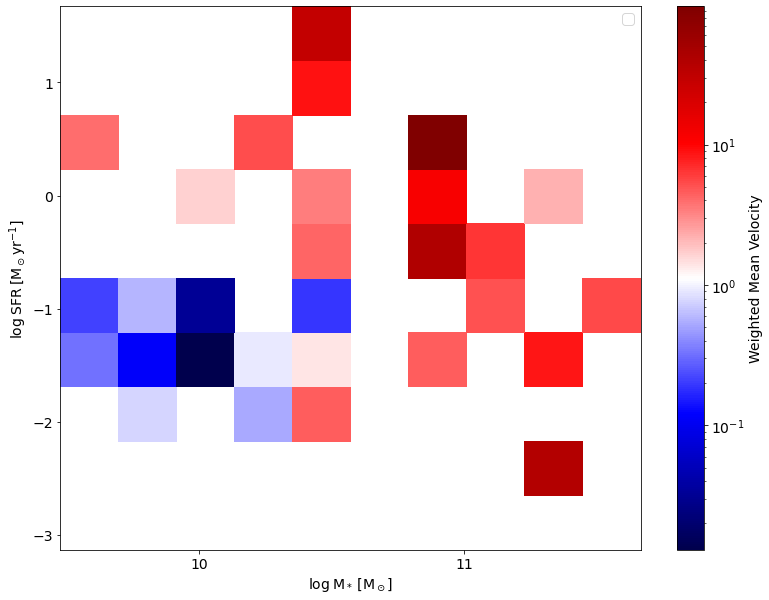

In [26]:
plt.figure(figsize=(13,10))
plt.rcParams.update({"font.size": 14})
plt.pcolormesh(massBinVals, sfrBinVals, mean, norm=mpl.colors.LogNorm(), cmap="seismic")
plt.colorbar(label="Weighted Mean Velocity")
plt.xlabel("$\\rm \log \: M_* \:[M_\odot]$")
plt.ylabel("$\\rm \log \: SFR \:[M_\odot yr^{-1}]$")
plt.xticks([ 10, 11, ], ["10", "11"])
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


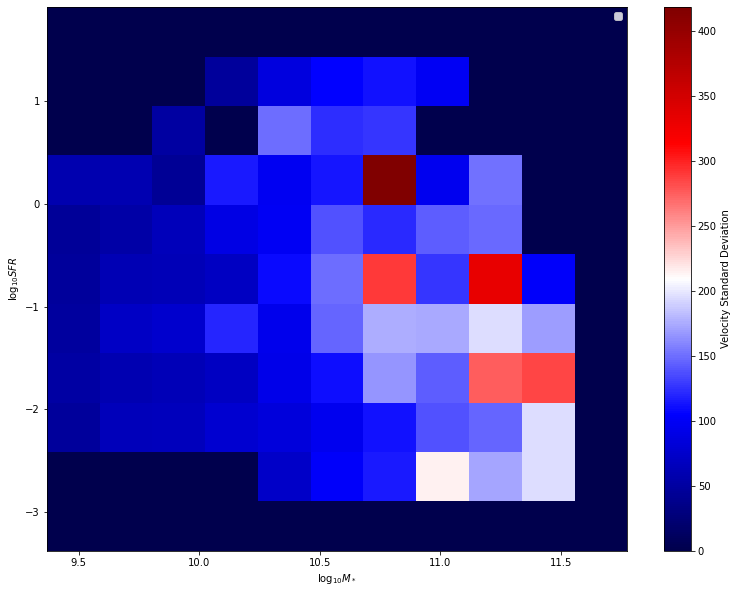

In [13]:
plt.figure(figsize=(13,10))
plt.pcolormesh(massBinVals, sfrBinVals, std, cmap="seismic")
plt.colorbar(label="Velocity Standard Deviation")
plt.xlabel("$\log_{10} M_*$")
plt.ylabel("$\log_{10} SFR$")
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


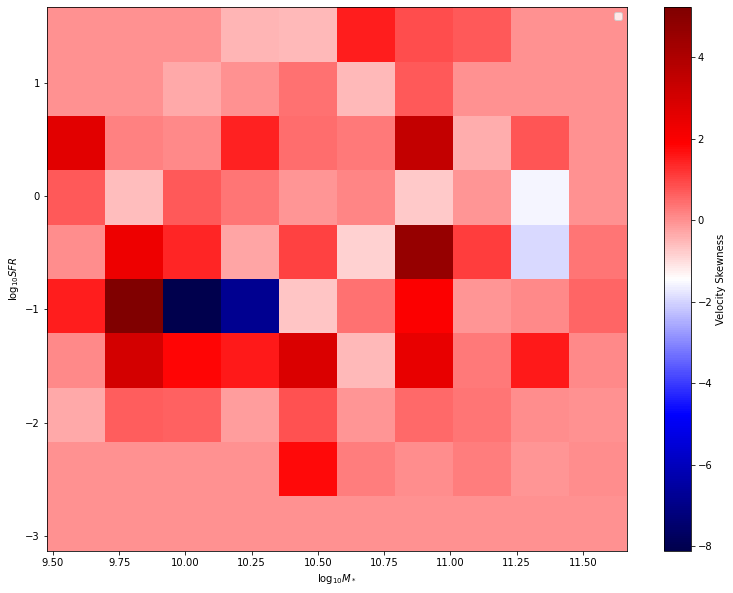

In [3]:
plt.figure(figsize=(13,10))
plt.pcolormesh(massBinVals, sfrBinVals, skew, cmap="seismic")
plt.colorbar(label="Velocity Skewness")
plt.xlabel("$\log_{10} M_*$")
plt.ylabel("$\log_{10} SFR$")
plt.legend()

In [1]:
# Function to get all of the particle data and add it together for means etc
from dataAnalysisFunctions import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Defining the number of mass and sfr bins
binNum = 10

# Loading in the galaxy data
galaxyData = pd.read_csv("linuxData/galaxyData2.csv", delimiter=",")

# Binning the masses and star formation rates
galaxyData, massBins, sfrBins, massBinVals, sfrBinVals = binGalaxy(galaxyData, binNum)



c:\Users\Work Account\OneDrive\GitHub\MastersProject\dataAnalysisFunctions.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["N Particles"] = pd.to_numeric(df["N Particles"])
c:\Users\Work Account\OneDrive\GitHub\MastersProject\dataAnalysisFunctions.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Mass"] = np.log10(df["Mass"])


,GalaxyID,Mass,Star Formation Rate,Particles,Velocity,Theta,Phi,Inclination,N Particles,Binned Mass,Binned Sfr
1,9350107.0,10.346332,-0.294413,True,-12.514524376495122619,0.0,0.0,0.0,39.0,3.0,5.0
2,9350107.0,10.346332,-0.294413,True,8.573287094334551391,30.0,0.0,30.0,59.0,3.0,5.0
3,9350107.0,10.346332,-0.294413,True,16.036863580939614093,30.0,60.0,30.0,84.0,3.0,5.0
4,9350107.0,10.346332,-0.294413,True,-0.4115273262551225886,30.0,120.0,30.0,55.0,3.0,5.0
5,9350107.0,10.346332,-0.294413,True,-21.364549781384843135,30.0,180.0,30.0,29.0,3.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
210814,58335132.0,9.520839,-0.370670,True,72.19370896272032229,150.0,180.0,30.0,12.0,0.0,5.0
210815,58335132.0,9.520839,-0.370670,True,76.401857771780319055,150.0,240.0,30.0,10.0,0.0,5.0
210816,58335132.0,9.520839,-0.370670,True,76.782788573521855345,150.0,300.0,30.0,16.0,0.0,5.0
210817,58335132.0,9.520839,-0.370670,True,53.320609474870625383,150.0,360.0,30.0,32.0,0.0,5.0


c:\Users\Work Account\OneDrive\GitHub\MastersProject\dataAnalysisFunctions.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["N Particles"] = pd.to_numeric(df["N Particles"])
C:\Users\Work Account\AppData\Local\Temp\ipykernel_22012\2469498907.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  galaxyData["Velocity"] = abs(galaxyData["Velocity"].to_numpy(dtype=float))


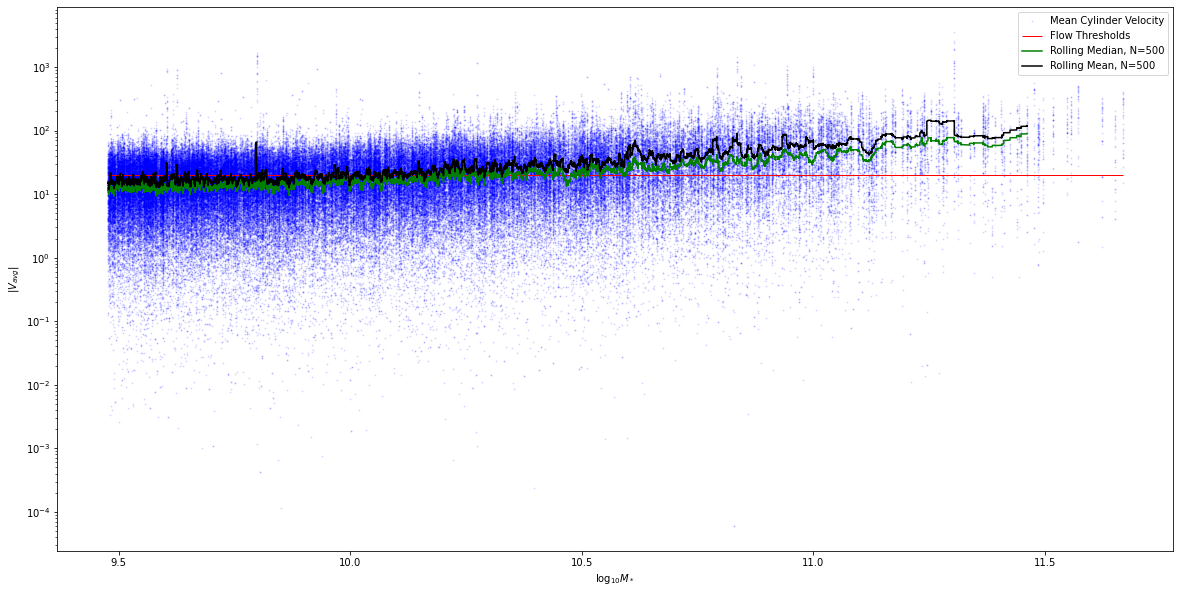

In [2]:
from dataAnalysisFunctions import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading in the galaxy data
galaxyData = pd.read_csv("linuxData/galaxyData2.csv", delimiter=",")

# Getting only valid values
galaxyData = removeNulls(galaxyData)

galaxyData["Velocity"] = abs(galaxyData["Velocity"].to_numpy(dtype=float))

# Getting arrays
masses = galaxyData["Mass"].to_numpy(dtype=float)
masses = np.log10(masses)
velocities = galaxyData["Velocity"].to_numpy(dtype=float)

# Plotting
plt.figure(figsize=(20,10))
plt.plot(masses, velocities, "bo", markersize=1, alpha=0.1, label="Mean Cylinder Velocity")
plt.hlines([20, -20], min(masses), max(masses), "r", lw=1, label="Flow Thresholds")

# Sorting and calculating the rolling median
numRolls = 500
galaxyData = galaxyData.sort_values(by=["Mass"], ascending=False)
galaxyData["RollingVelsMedian"] = galaxyData["Velocity"].rolling(numRolls).median()
galaxyData["RollingVelsMean"] = galaxyData["Velocity"].rolling(numRolls).mean()

rollingVelsMed = galaxyData["RollingVelsMedian"].to_numpy()
rollingVelsMed = rollingVelsMed[numRolls-1:]

rollingVelsMean = galaxyData["RollingVelsMean"].to_numpy()
rollingVelsMean = rollingVelsMean[numRolls-1:]

mass = galaxyData["Mass"].to_numpy()
mass = mass[numRolls-1:]

# Plotting therolling median
plt.plot(np.log10(mass), rollingVelsMed, "g", label=("Rolling Median, N=%s" % numRolls))
plt.plot(np.log10(mass), rollingVelsMean, "k", label=("Rolling Mean, N=%s" % numRolls))
plt.yscale("log")
plt.xlabel("$\\log_{10} M_*$")
plt.ylabel("$|V_{avg}|$")
plt.legend()

c:\Users\Work Account\OneDrive\GitHub\MastersProject\dataAnalysisFunctions.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["N Particles"] = pd.to_numeric(df["N Particles"])
C:\Users\Work Account\AppData\Local\Temp\ipykernel_22012\271860917.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  galaxyData["Velocity"] = abs(galaxyData["Velocity"].to_numpy(dtype=float))


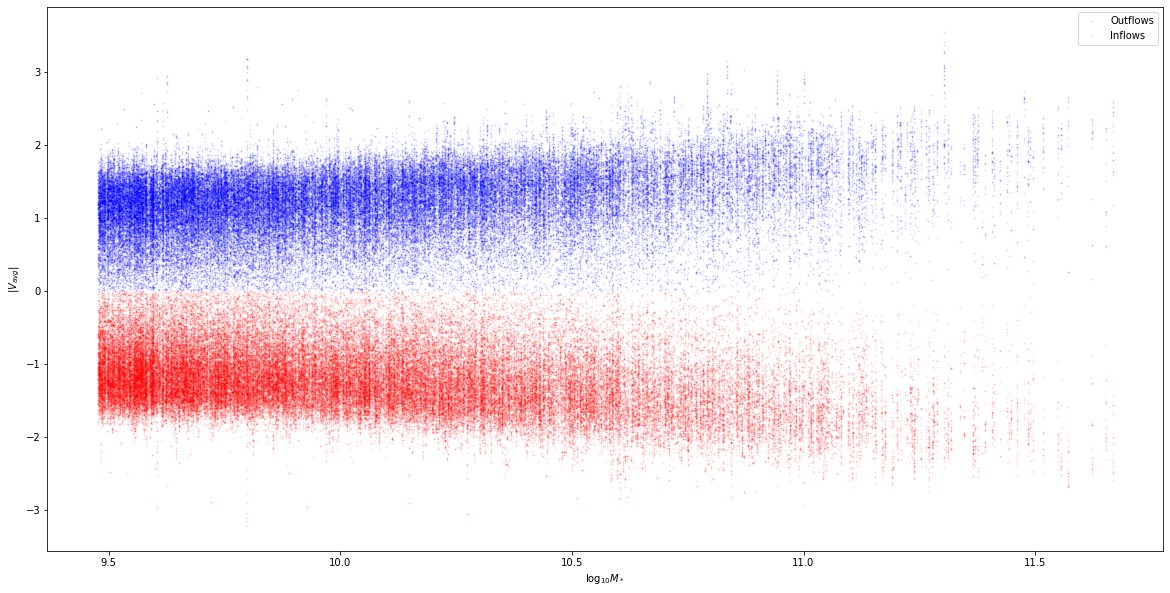

In [19]:
from dataAnalysisFunctions import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading in the galaxy data
galaxyData = pd.read_csv("linuxData/galaxyData2.csv", delimiter=",")

# Getting only valid values
galaxyData = removeNulls(galaxyData)

# Getting the sign of the velocities
velSign = np.sign(galaxyData["Velocity"].to_numpy(dtype=float))

galaxyData["Velocity"] = abs(galaxyData["Velocity"].to_numpy(dtype=float))

# Getting arrays
masses = galaxyData["Mass"].to_numpy(dtype=float)
masses = np.log10(masses)
velocities = galaxyData["Velocity"].to_numpy(dtype=float)
velocities = np.log10(velocities)


velSign = velSign[velocities>0]
masses = masses[velocities>0]
velocities = velocities[velocities>0]

signedData = velocities * velSign

plt.figure(figsize=(20,10))
plt.plot(masses[signedData>0], signedData[signedData>0], "bo", markersize=1, alpha=0.1, label="Outflows")
plt.plot(masses[signedData<0], signedData[signedData<0], "ro", markersize=1, alpha=0.1, label="Inflows")
plt.xlabel("$\\log_{10} M_*$")
plt.ylabel("$|V_{avg}|$")
plt.legend()


c:\Users\Work Account\OneDrive\GitHub\MastersProject\dataAnalysisFunctions.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["N Particles"] = pd.to_numeric(df["N Particles"])
C:\Users\Work Account\AppData\Local\Temp\ipykernel_22012\3412761707.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  galaxyData["Velocity"] = abs(galaxyData["Velocity"].to_numpy(dtype=float))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is cal

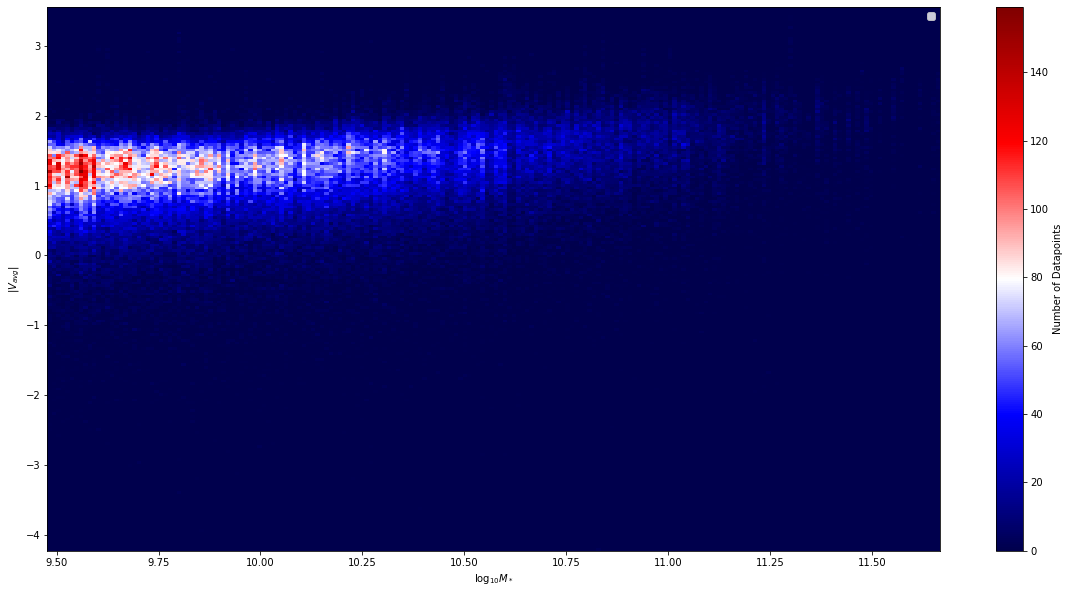

In [23]:
from dataAnalysisFunctions import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading in the galaxy data
galaxyData = pd.read_csv("linuxData/galaxyData2.csv", delimiter=",")

# Getting only valid values
galaxyData = removeNulls(galaxyData)

galaxyData["Velocity"] = abs(galaxyData["Velocity"].to_numpy(dtype=float))

# Getting arrays
masses = galaxyData["Mass"].to_numpy(dtype=float)
masses = np.log10(masses)
velocities = galaxyData["Velocity"].to_numpy(dtype=float)
velocities = np.log10(velocities)

plt.figure(figsize=(20,10))
h = plt.hist2d(masses, velocities, bins=200, cmap="seismic")
plt.colorbar(label="Number of Datapoints")
plt.xlabel("$\\log_{10} M_*$")
plt.ylabel("$|V_{avg}|$")
plt.legend()

c:\Users\Work Account\OneDrive\GitHub\MastersProject\dataAnalysisFunctions.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["N Particles"] = pd.to_numeric(df["N Particles"])
C:\Users\Work Account\AppData\Local\Temp\ipykernel_22012\4034905396.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  galaxyData["Velocity"] = galaxyData["Velocity"].to_numpy(dtype=float)


([<matplotlib.axis.XTick at 0x18523f53610>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

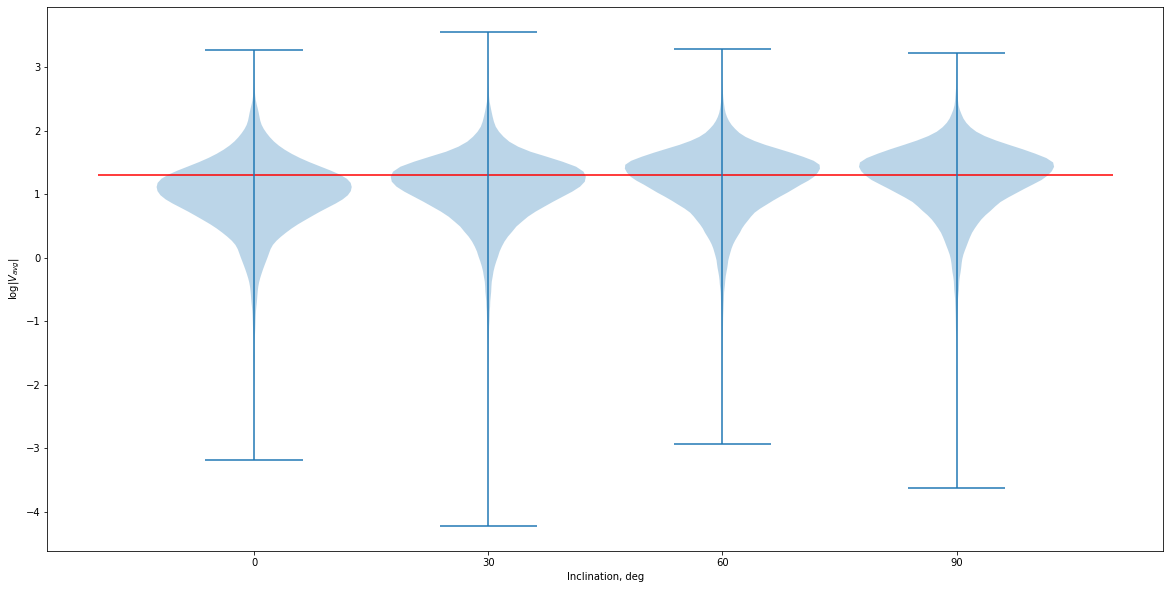

In [52]:
from dataAnalysisFunctions import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading in the galaxy data
galaxyData = pd.read_csv("linuxData/galaxyData2.csv", delimiter=",")

# Getting only valid values
galaxyData = removeNulls(galaxyData)

galaxyData["Velocity"] = galaxyData["Velocity"].to_numpy(dtype=float)


# Getting arrays
inclinations = galaxyData["Inclination"].to_numpy(dtype=float)
velocities = abs(galaxyData["Velocity"].to_numpy(dtype=float))
velocities = np.log10(velocities)

uniqueInclinations = np.unique(inclinations)

plt.figure(figsize=(20,10))
plt.hlines(np.log10(20), -20, 110, "r")

data = []

for i in range(len(uniqueInclinations)):

    data.append(velocities[inclinations==uniqueInclinations[i]])

b = plt.violinplot(data, positions=uniqueInclinations, widths=25)
plt.xlabel("Inclination, deg")
plt.ylabel("$\\log |V_{avg}|$")
plt.xticks(uniqueInclinations)


In [10]:
from dataAnalysisFunctions import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Binning the galaxy data 
binNum = 10

# Loading galaxy data
galaxyData = pd.read_csv("galaxyData5.csv", delimiter=",")

# Cleaning data
galaxyData = removeNulls(galaxyData)

# Binning the data
galaxyData, massBins, sfrBins, massBinVals, sfrBinVals = binGalaxy(galaxyData, binNum)

# Creating arrays to store the values
means = np.zeros((binNum, binNum))
numFlows = np.zeros_like(means)
numGals = np.zeros_like(means)

# Reversing the sfr bins to get right plot ordering
ss = [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
    
# Looping through all m and s
for s in range(binNum):
    for m in range(binNum):

        data = galaxyData[galaxyData["Binned Mass"] == m]
        data = data[data["Binned Sfr"] == s]

        vels = data["Outflow Velocity"].to_numpy()
        mass = data["Outflow Rates"].to_numpy()
        
        numGals[ss[s]][m] = len(vels)
        absVels = np.abs(vels)
        vels = vels[absVels > 0]

        if len(vels) == 0:
            means[ss[s]][m] = 0
            numFlows[ss[s]][m] = 0
        else:
            means[ss[s]][m] = np.average(vels)
            numFlows[ss[s]][m] = len(vels)

c:\Users\Matth\OneDrive\Documents\University [MPhys]\Year 4\PX4310 - Physics Project\Code\dataAnalysisFunctions.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["N Particles"] = pd.to_numeric(df["N Particles"])


No handles with labels found to put in legend.
<ipython-input-11-a329bc9c68af>:15: RuntimeWarning: invalid value encountered in true_divide
  percent = numFlows / numGals


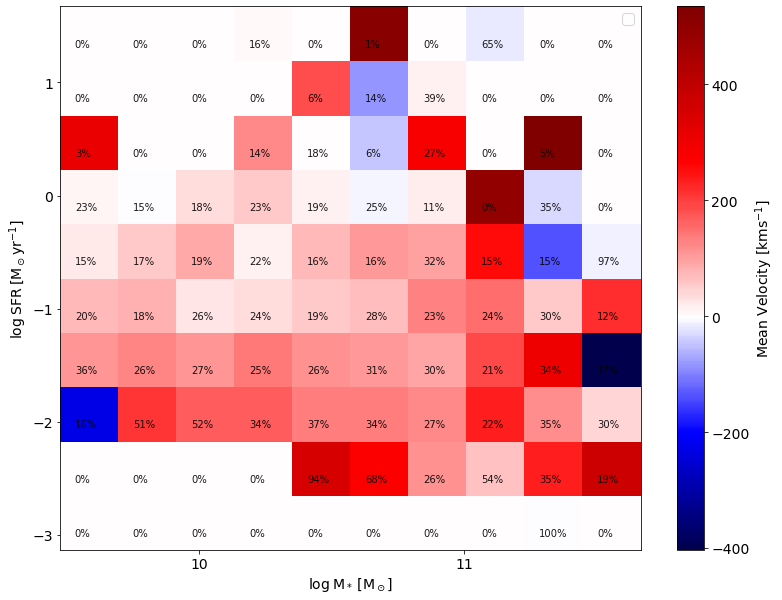

In [11]:
import matplotlib as mpl
plt.figure(figsize=(13,10))
plt.rcParams.update({"font.size": 14})
plt.pcolormesh(massBinVals, sfrBinVals, means, norm=mpl.colors.TwoSlopeNorm(vcenter=0), cmap="seismic")
plt.colorbar(label="Mean Velocity $\\rm [kms^{-1}]$")
plt.xlabel("$\\rm \log \: M_* \:[M_\odot]$")
plt.ylabel("$\\rm \log \: SFR \:[M_\odot yr^{-1}]$")
plt.xticks([ 10, 11, ], ["10", "11"])
plt.legend()

# Looping through all m and s
massBinRange = massBinVals[1] - massBinVals[0]
sfrBinRange = sfrBinVals[1] - sfrBinVals[0]

percent = numFlows / numGals

for s in range(binNum):
    for m in range(binNum):

        if np.isnan(percent[ss[s]][m]):
            percent[ss[s]][m] = 0

        plt.text(massBinVals[m]+ 0.25*massBinRange, sfrBinVals[ss[s]] + 0.25*sfrBinRange, str(int(100*percent[ss[s]][m]))+"%", fontsize=10, alpha=0.9)

In [34]:
galaxyData

,Unnamed: 0,Unnamed: 0.1,GalaxyID,Mass,Star Formation Rate,Particles,Velocity,Theta,Phi,Inclination,N Particles,Star Formation Rate Density,Stellar Density,Rotation Velocity,Outflow Rates,Outflow Velocity,Mass Loading Factor,Binned Mass,Binned Sfr
1,1,1,9350107.0,10.346332,-0.294413,True,-12.514524376495122619,0.0,0.0,0.0,39.0,0.008106,3.544584e+08,158.696039,0.000000,0.000000,0.000000,3.0,5.0
2,2,2,9350107.0,10.346332,-0.294413,True,8.573287094334551391,30.0,0.0,30.0,59.0,0.008106,3.544584e+08,158.696039,0.000000,0.000000,0.000000,3.0,5.0
3,3,3,9350107.0,10.346332,-0.294413,True,16.036863580939614093,30.0,60.0,30.0,84.0,0.008106,3.544584e+08,158.696039,0.000000,0.000000,0.000000,3.0,5.0
4,4,4,9350107.0,10.346332,-0.294413,True,-0.4115273262551225886,30.0,120.0,30.0,55.0,0.008106,3.544584e+08,158.696039,0.000000,0.000000,0.000000,3.0,5.0
5,5,5,9350107.0,10.346332,-0.294413,True,-21.364549781384843135,30.0,180.0,30.0,29.0,0.008106,3.544584e+08,158.696039,0.000000,0.000000,0.000000,3.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210814,210814,210814,58335132.0,9.520839,-0.370670,True,72.19370896272032229,150.0,180.0,30.0,12.0,0.034390,2.678791e+08,98.671733,0.000000,0.000000,0.000000,0.0,5.0
210815,210815,210815,58335132.0,9.520839,-0.370670,True,76.401857771780319055,150.0,240.0,30.0,10.0,0.034390,2.678791e+08,98.671733,0.000000,0.000000,0.000000,0.0,5.0
210816,210816,210816,58335132.0,9.520839,-0.370670,True,76.782788573521855345,150.0,300.0,30.0,16.0,0.034390,2.678791e+08,98.671733,207.261811,202.075357,486.619164,0.0,5.0
210817,210817,210817,58335132.0,9.520839,-0.370670,True,53.320609474870625383,150.0,360.0,30.0,32.0,0.034390,2.678791e+08,98.671733,0.000000,0.000000,0.000000,0.0,5.0


In [62]:
''' Function to plot the average mass outflow rate against stellar mass '''

from dataAnalysisFunctions import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading in the galaxy data
galaxyData = pd.read_csv("galaxyDataSave2.csv", delimiter=",")

# Selecting just one cylinder
galaxyDataCut = galaxyData[galaxyData["Theta"] == "0.0"]
galaxyData = galaxyDataCut[galaxyDataCut["Phi"] == "0.0"]

# Conversions
galaxyData["Mass"] = np.log10(galaxyData["Mass"])
galaxyData["Mass Outflow Rate"] = np.abs(galaxyData["Mass Outflow Rate"].to_numpy())

m = galaxyData["Mass"].to_numpy()

# Binning
bins = np.linspace(min(m), max(m), 20)
galaxyData["Binned Mass"], mBinsV = pd.cut(galaxyData["Mass"], bins, labels=False, retbins=True)

mBins = np.unique(galaxyData["Binned Mass"])
mBins = mBins[:-1]
outflowData = []

for i in range(len(mBins)):
    selection = galaxyData[galaxyData["Binned Mass"] == mBins[i]]
    outflows = selection["Mass Outflow Rate"].to_numpy()
    outflowAverage = np.mean(outflows)
    outflowData.append(np.log10(outflowAverage))

([<matplotlib.axis.XTick at 0x213bf91c6d0>,
 [Text(10, 0, '10'), Text(11, 0, '11')])

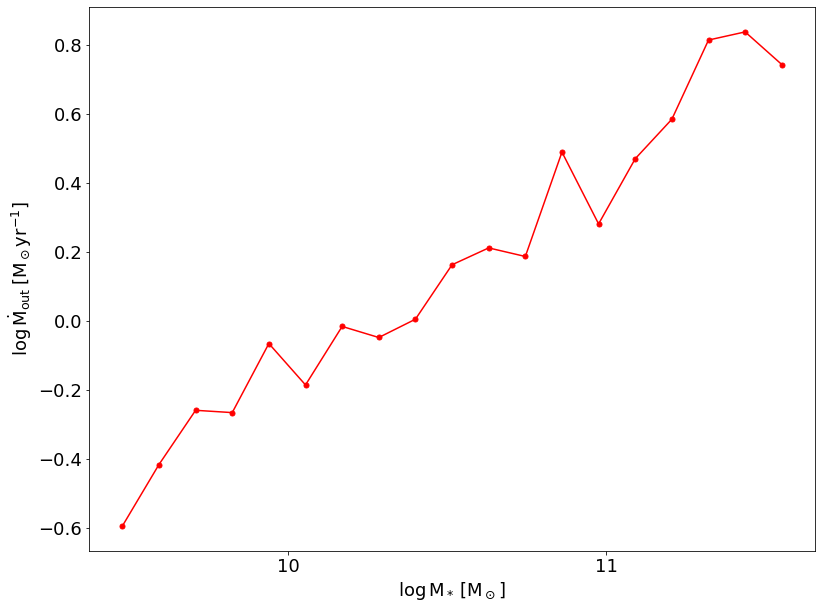

In [63]:
plt.figure(figsize=(13,10))
plt.rcParams.update({"font.size": 18})
plt.plot(mBinsV[:-1], outflowData, "r")
plt.plot(mBinsV[:-1], outflowData, "ro", markersize=5)
plt.xlabel("$\\rm \log M_* \:[M_\odot]$")
plt.ylabel("$\\rm \log \dot{M}_{out}\: [M_\odot yr^{-1}]$")
plt.xticks([10, 11], [10, 11])

In [44]:
galaxyData

,Unnamed: 0.1,Unnamed: 0,GalaxyID,Mass,Star Formation Rate,Particles,Velocity,Theta,Phi,Inclination,N Particles,Star Formation Rate Density,Stellar Density,Rotation Velocity,Mass Outflow Rate,Outflow Velocity,Mass Loading Factor,Binned SFR
1,1,1,9350107.0,22198947840,0.507677,True,-12.514524376495122619,0.0,0.0,0.0,39.0,0.008152,3.564758e+08,147.420756,0.000000,0.000000,0.000000e+00,0.0
38,38,38,11198218.0,5576778239,0.752941,True,13.976606320133260508,0.0,0.0,0.0,77.0,0.006412,4.749458e+07,104.368966,0.000000,0.000000,0.000000e+00,0.0
75,75,75,11200860.0,4529167360,0.500787,True,-15.847405844046290273,0.0,0.0,0.0,69.0,0.007355,6.652180e+07,99.078661,0.000000,0.000000,0.000000e+00,0.0
112,112,112,11215015.0,9676275712,0.378505,True,-30.276054990041534325,0.0,0.0,0.0,65.0,0.001509,3.857842e+07,119.785043,0.000000,0.000000,0.000000e+00,0.0
149,149,149,11222150.0,3157006848,0.165913,True,19.450699585477232729,0.0,0.0,0.0,37.0,0.007089,1.348809e+08,90.530395,0.138657,224.181731,4.392055e-11,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210582,210582,210582,58640298.0,4081733632,0.540685,True,-3.0976550613129550057,0.0,0.0,0.0,108.0,0.030581,2.308648e+08,96.535422,0.419405,508.019410,1.027517e-10,0.0
210651,210651,210651,58691642.0,3403732992,1.397647,True,-46.710836463513723513,0.0,0.0,0.0,224.0,0.323095,7.868428e+08,92.249582,7.382690,-213.478337,-2.168998e-09,0.0
210695,210695,210695,58783375.0,4140790528,0.016353,True,4.714656066630765164,0.0,0.0,0.0,13.0,0.000719,1.820654e+08,96.882726,0.000000,0.000000,0.000000e+00,0.0
210735,210735,210735,57789046.0,4206856191,0.180509,True,-20.790323934499631243,0.0,0.0,0.0,88.0,0.011349,2.644985e+08,97.266873,1.568449,-254.232321,-3.728316e-10,0.0


In [50]:
''' Function to plot the average mass outflow rate against star formation rate '''

from dataAnalysisFunctions import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading in the galaxy data
galaxyData = pd.read_csv("galaxyDataSave2.csv", delimiter=",")

galaxyData = removeNulls(galaxyData)
galaxyData = galaxyData[galaxyData["Star Formation Rate"] > 0]

# Selecting just one cylinder
galaxyDataCut = galaxyData[galaxyData["Theta"] == "0.0"]
galaxyData = galaxyDataCut[galaxyDataCut["Phi"] == "0.0"]

# Conversions
galaxyData["Star Formation Rate"] = np.log10(galaxyData["Star Formation Rate"])
galaxyData["Mass Outflow Rate"] = np.abs(galaxyData["Mass Outflow Rate"].to_numpy())

s = galaxyData["Star Formation Rate"].to_numpy()

# Binning
bins = np.linspace(min(s), max(s), 10)
galaxyData["Binned SFR"], sBinsV = pd.cut(galaxyData["Star Formation Rate"], bins, labels=False, retbins=True)

sBins = np.unique(galaxyData["Binned SFR"])
sBins = sBins[:-1]
outflowData = []

for i in range(len(sBins)):
    selection = galaxyData[galaxyData["Binned SFR"] == sBins[i]]
    outflows = selection["Mass Outflow Rate"].to_numpy()
    outflowAverage = np.mean(outflows)
    outflowData.append(np.log10(outflowAverage))

c:\Users\Work Account\OneDrive\Documents\University [MPhys]\Year 4\PX4310 - Physics Project\Code\dataAnalysisFunctions.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["N Particles"] = pd.to_numeric(df["N Particles"])


Text(0, 0.5, '$\\rm \\log \\dot{M}_{out}\\: [M_\\odot yr^{-1}]$')

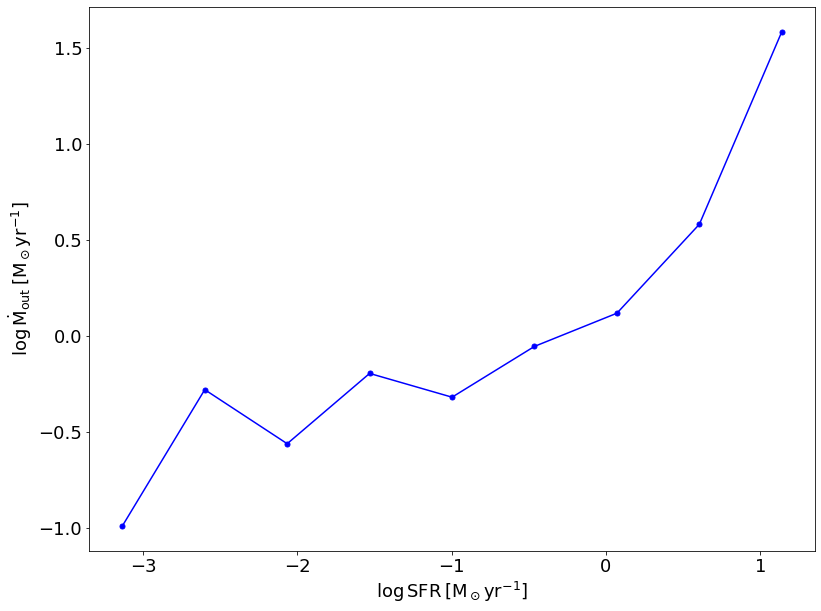

In [54]:
plt.figure(figsize=(13,10))
plt.rcParams.update({"font.size": 18})
plt.plot(sBinsV[:-1], outflowData, "b")
plt.plot(sBinsV[:-1], outflowData, "bo", markersize=5)
plt.xlabel("$\\rm \log SFR \:[M_\odot yr^{-1}]$")
plt.ylabel("$\\rm \log \dot{M}_{out}\: [M_\odot yr^{-1}]$")
#plt.xticks([10, 11], [10, 11])